In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import random 

660 329


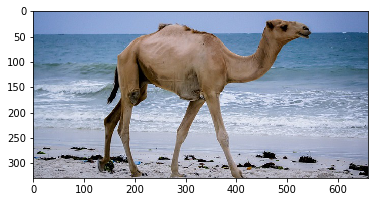

In [2]:
# reading image and its parameters
imgColor = cv2.imread('cml.png')
imgColor = cv2.cvtColor(imgColor, cv2.COLOR_BGR2RGB)
Gray = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
height = Gray.shape[0]
width = Gray.shape[1]
print(width,height)
plt.imshow(imgColor)

In [3]:
data = np.zeros((height*width,5),dtype=np.float64)
for i in range(height):
    for j in range(width):
        data[i*width+j][0] = imgColor[i][j][0]       # creating [r,g,b,x,y] data of image
        data[i*width+j][1] = imgColor[i][j][1]
        data[i*width+j][2] = imgColor[i][j][2]
        data[i*width+j][3] = i
        data[i*width+j][4] = j

for i in range(height*width):                       # normalising data
    for j in range(5):
        if(j<3):
            data[i][j] /= 255
        elif(j==3):
            data[i][j] /= height
        else:
            data[i][j] /= width

In [4]:
def meanValues(listdata):        # getting mean values of r,g,b from a list and denormalizing it
    listdata=np.array(listdata)
    r=listdata[:,0].mean()
    g=listdata[:,1].mean()
    b=listdata[:,2].mean()
    r=int(float(r)*255)
    g=int(float(g)*255)
    b=int(float(b)*255)
    return [r,g,b]


In [5]:
to_be_labelled = np.arange(1,height*width)            # initially all points to be labelled

labelled = []                                         # already labelled points
labels = np.zeros(((height*width),1))                 # for final labels

mean_colors = {}
bw = 0.2
k=0
tt=0
while(1):
    can_be_labelled = list(set(to_be_labelled).difference(set(labelled))) # getting points that can be labelled    
#     print(len(can_be_labelled))

    if(len(can_be_labelled)==0):
        break
    if(len(can_be_labelled)==tt): # for last iteration
        k = k+1

        can_be_labelled_data=[]
        for j in can_be_labelled:
            can_be_labelled_data.append(data[j])
            labels[j] = k
        labelled.extend(can_be_labelled)
        mean_colors[k] = meanValues(can_be_labelled_data)  # getting r,g,b values for mean pixels
        break

    tt = len(list(can_be_labelled))   
    random_index = max(1,random.choice(can_be_labelled))
    point = data[random_index]

    while (1):
        old_point = point
        dst = [] 
        similar = []
        similar_data = []
        for i in can_be_labelled:
            pt = data[i]
            dist = abs(np.linalg.norm(pt-old_point))
            if(dist<bw):                               # check if pixel is similar to random point choosen
                similar.append(i)                      # appending similar pixel
                similar_data.append(data[i])

        if(len(similar)<100):
            break

        point = np.mean(similar_data, axis = 0)

        sum = abs(np.linalg.norm(point-old_point))
        if(sum < 0.0001):
            k = k+1

            for s in similar:
                labels[s] = k                # generating new label

            labelled.extend(similar)
            mean_colors[k] = meanValues(similar_data)    # getting r,g,b values for mean pixels
            break

In [6]:
labels=np.array(labels)                    # genrating label and mean_color for outliers i.e. label 0
print(len(labels))
noise = np.nonzero(labels == 0)
noisy_data=[]
for m in noise:
    noisy_data.append(data[m][0])
if len(noisy_data)==0:
    mean_colors[0]=[0,0,0] 
else:
    mean_colors[0]=meanValues(noisy_data)

final_matrix = np.zeros((imgColor.shape))  # final image matrix
flabels=labels.reshape(height,width)       
r,c = flabels.shape
for i in range(r):
    for j in range(c):
        final_matrix[i,j]=mean_colors[flabels[i,j]] # generating final image

217140


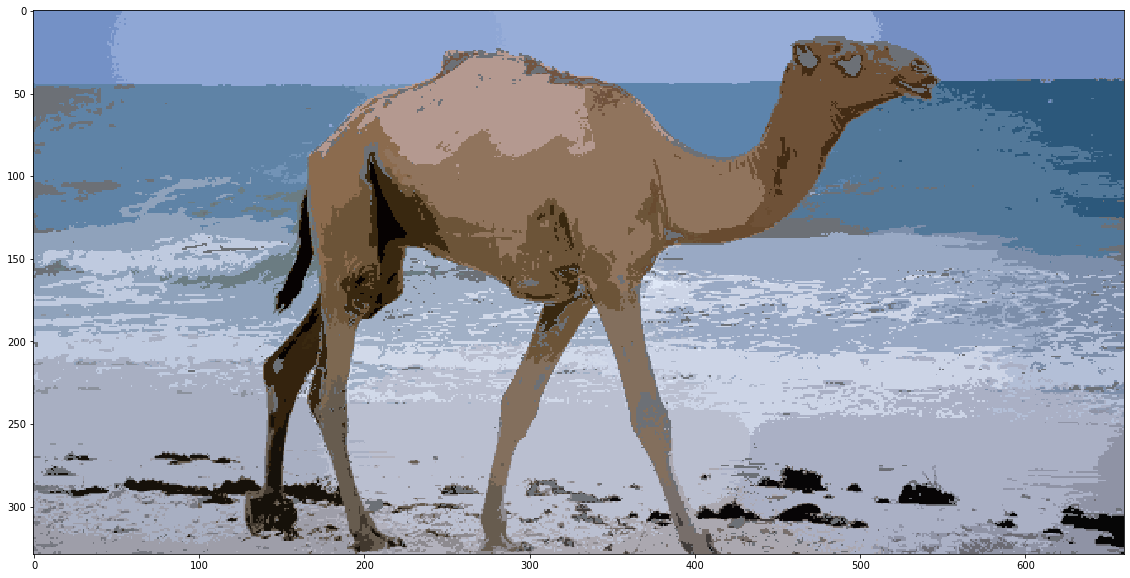

In [7]:
plt.figure(figsize=(20,10))
plt.imshow(final_matrix.astype('uint8'))                   # displaying final mean-shift image
plt.savefig('Mean_Shift.png',format = "png", dpi = 300)